# Exploring each Group to Look at ways to Analyze
## DRAFT WORK ##

## now only erroring on original 3 .txt noted by Ian Gorton in original commnication



# TO DO

# broken down by conferences and years...  (enter a keyword and see trend over conference and year.
- Search by Conf and Year DONE
- - see visual breakdown DONE
- - link to the link to the papers/title/abstract DONE
- - link to the top 10 keywords and papers (see a pie chart) DONE

## top keywords(cts?) for given conference over the years.
- - NEED TO DO : choose top 10 and see over time for a conference?

## compare the confernces - given two conferences display their top keywords for a given year
- - can do it but not at the same time



# Keywords
-  search for a keyword
- - see its trends (heatmap of conf/year/count)
- - see counts per conf/year
- - see what papers it is part of
- from conf/year link to the papers/title/abstract

# Authors
## do same for authors and what conferences.

## top 20 authors and their keywords, conferences, trends over time.
 

In [1]:
import sqlite3
import pandas as pd
mydb = 'Abstracts_DB.db'

In [2]:
import sqlcommands as cmd
cmd = reload(cmd)

(1548, 7)
(1548, 7)


# Functions to test visualizations (in ../Flask/app/images.py)

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cStringIO import StringIO
import base64
import seaborn as sns
%matplotlib inline

def getPieOne(df, conference):
    fig = plt.figure()
    fig = df.plot(kind = 'pie', 
                  colormap = 'Blues', 
                  title = conference, 
                  subplots = True, 
                  legend = False, 
                  labels = ['' for x in np.arange(len(df))])
    plt.ylabel('')
    plt.legend( list(df.index), 
               bbox_to_anchor=(1.1, 1),
              fontsize = "xx-small")
    
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    
    return fig
    #plt.close()
    #return script.format(data)


def getBar(df, conference, xaxis, yaxis, orientation, ylabel = 'count', xlabel = 'trada'):
    plt.cla()
    fig = sns.barplot(data = df, 
                      y =  yaxis,#'keyword', 
                      x = xaxis, #'count', 
                      palette='Blues', 
                      orient = orientation)
    fig.set_ylabel(ylabel)
    fig.set_xlabel(xlabel)
    
    #for l in fig.get_ymajorticklabels():
        #l.set_visible(False)
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #plt.close()
    #return script.format(data)


def getHeatMap(data_frame, indexCol = 'confName', cols = 'pubYear', vals = 'counts', annott = True):
    #plt.cla()
    
    fig = sns.heatmap(data_frame.pivot_table(index=indexCol, 
                                             columns=cols, 
                                             values=vals), 
                                             annot = annott,
                                             cmap = 'Blues',
                     )
    
   
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #plt.close()
    #return script.format(data)

def getSpot(d, KWgrouper, xaxis = 'pubYear', yaxis = 'coded', sizes = 'counts'):
    
    labels = {'WICSA':1, "ECSA":2, 'QoSA':3}
    df = d.groupby(KWgrouper)['keyword'].count().reset_index(name="counts")
    
    df['coded'] = df.confName.apply(lambda x: labels[x])
    
    fig = plt.scatter(x=df[xaxis], y =df[yaxis], s = df[sizes]*10)
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig 
    
def getLine(data_frame, xaxis = 'confName', yaxis = 'counts'):
    #plt.cla()
    fig = sns.swarmplot(data = data_frame, 
                        x=xaxis, 
                        y = yaxis,
                        palette = 'Blues')
    
    io = StringIO()
    plt.savefig(io, format='png')
    img = base64.encodestring(io.getvalue())
   
    io = StringIO()
    plt.savefig(io, format='png')
    data = base64.encodestring(io.getvalue())
    script = '''<img src="data:image/png;base64,{}";/>'''
    return fig
    #return script.format(data)

# Conference and Publications
- DONE
- - Search by Conference and Year
- - See visual breakdown by Conf and Year
- - Links to what were the top 10 keywords (and their papers)
- - Links to the Papers and their keywords for that Pub/Conf breakdown


In [4]:
def getContentsconf():
    with sqlite3.connect(mydb) as con:
        sqlcmd = "SELECT Conf, Year FROM ABSTRACTSTOTAL"
        df = pd.read_sql_query(sqlcmd, con)
        myt = []
    
        
        conferences = list(df['Conf'].unique())
    
   
        for conf in conferences:
        
            entry = {}
            entry['conf'] = conf
        
            subDF = df.query('Conf == "%s"' % conf).groupby('year').count()
            entry['counts'] = subDF.to_html()
            
            image = getPieOne(subDF, conf)
            entry['Pie']  = image
            
            subDF.reset_index(inplace = True)
            image2 = getBar(subDF, 
                            conf, 
                            xaxis = 'year', yaxis = 'Conf', 
                            orientation = "v"
                            )
            entry['Bar'] = image2
        
            myt.append(entry)
    
    return dict(data = myt), df, subDF

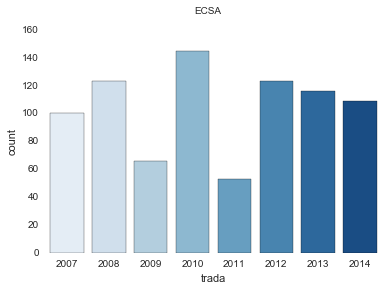

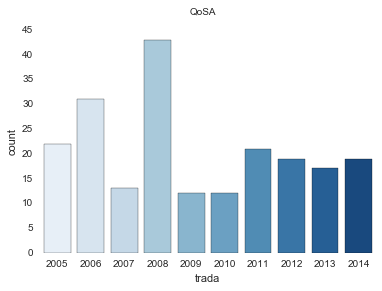

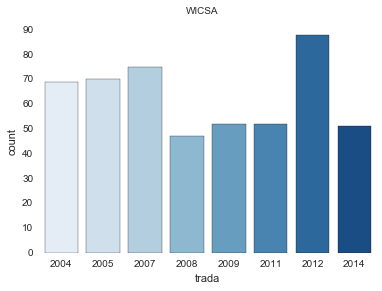

In [5]:
g, df, s = getContentsconf()

# Trying HeatMap

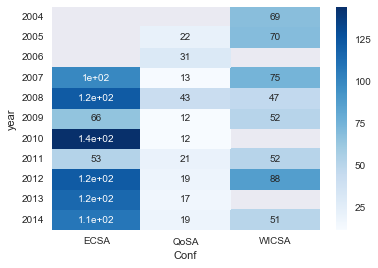

In [6]:
df = df.groupby(['Conf', 'year'])['Conf'].count().reset_index(name="counts")
y = sns.heatmap(df.pivot_table(index='year', columns='Conf', values='counts'),
                                             cmap = 'Blues', annot = True)


# Papers and Their Keywords
- search by Keyword - get paperIds, conf, years, link to HEATMAP of count over the years/conferences



In [7]:
def getPapersKWgroup(grouper):
    
    with sqlite3.connect('Abstracts_DB.db') as con:
        sqlcmd = "SELECT paperID, title, confName, pubYear FROM PAPER "
        
        paperdf = pd.read_sql_query(sqlcmd, con)
        
        sqlcmd2 = "SELECT paperID, keyword FROM PAPERKEY "
        kwdf = pd.read_sql_query(sqlcmd2, con)
        kwdf['keyword'] = kwdf['keyword'].apply(lambda word: eval(word))
        
        merged = kwdf.merge(paperdf, on = 'paperID')
        
        subgrp = merged.groupby(grouper)
        
        return merged, subgrp



def confYrKeywords(top = 10):
    grouper = ['confName', 'pubYear']
    m, f = getPapersKWgroup(grouper)
    myentries = []
    for group in f.groups.keys():
        #print group
        keywordcts = f.get_group((group)).groupby(["keyword"])["keyword"].count()
        
        kwdftop = keywordcts.sort_values(ascending = False).head(top)
        
        resetKW = pd.DataFrame(kwdftop).rename(columns = {'keyword' : 'count'})
        entry = {}
        entry['Group'] = group
        
        entry['Pie'] = getPieOne(resetKW, group)
        entry['Counts'] = resetKW.to_html()
        
        myentries.append(entry)
    
    return dict(data = myentries)

    

def getKWTRends(kw, grouper):
    
    m, f = getPapersKWgroup(grouper)
    
    query2 = '"%s" == keyword' %kw
    
    data_frame = m.copy()
    data_frame.query(query2, inplace = True)
    new = data_frame.copy()
    
    def findKWTrend(df, KWgrouper = ["pubYear", "confName"]):

        df = df.groupby(KWgrouper)['keyword'].count().reset_index(name="counts")
        
        try:
            return getHeatMap(df)
        except:
            return 'no data'
        
    
    image = findKWTrend(new)
    image2 =  getSpot(new, KWgrouper = ["pubYear", "confName"])
    
    myentry = [{'table' : data_frame.to_html(),
                'trend'  : image, 
                'sizes' : image2
               }]
    
    return dict(data = myentry)

def seeKWTop20(top = 20):
    m, f = getPapersKWgroup('keyword')
    
    topWds = f.count().sort_values(by = 'confName', ascending = False)[:top]
    
    mTop20 = m[m['keyword'].isin(topWds.index)]
    
    mTop20['counts'] = mTop20.groupby(['confName', 'pubYear', 'keyword'])['keyword'].transform('count')
    
    image = getHeatMap(mTop20, indexCol='keyword', cols = ['confName', 'pubYear'], vals = 'counts', annott = False)
    
    topWds.reset_index(inplace = True)
    topWds.rename(columns = {'confName' : 'OverallCount'}, inplace = True)
    cts = topWds[['keyword', 'OverallCount']]
    
    
    
    return dict(data = 
                        {'Top20' : cts,
                       'HeatMap' : image})
                    

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


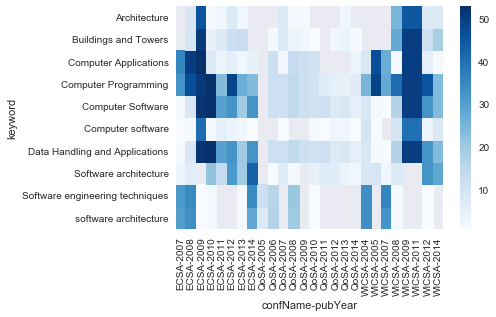

In [8]:
h = seeKWTop20(top = 10)


/Users/aileennovero1/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


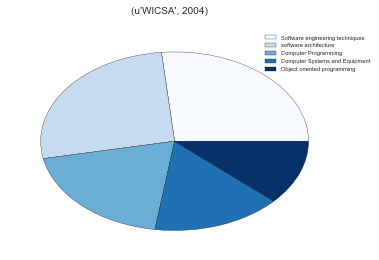

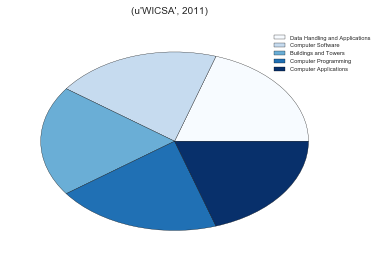

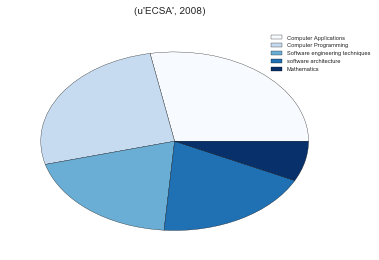

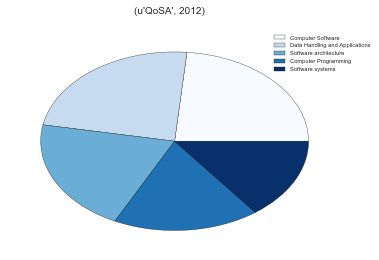

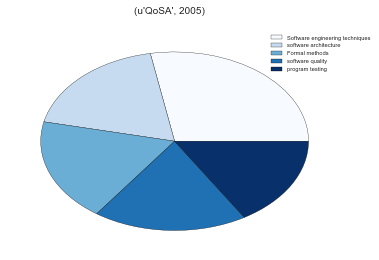

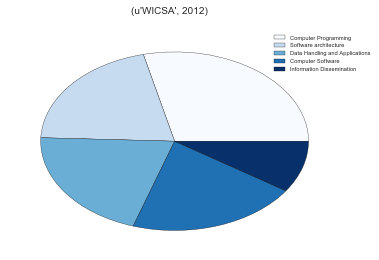

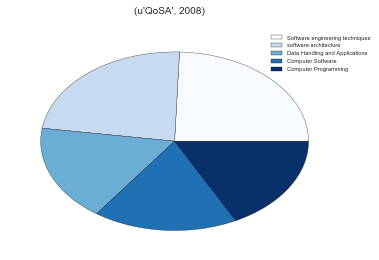

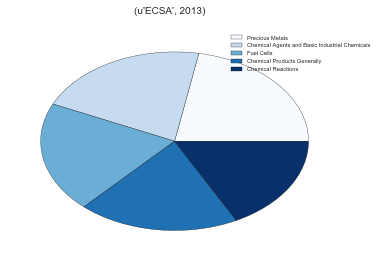

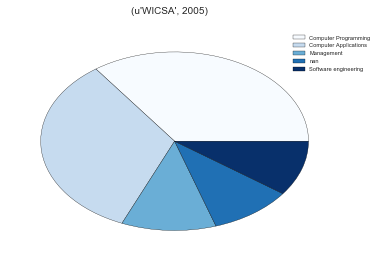

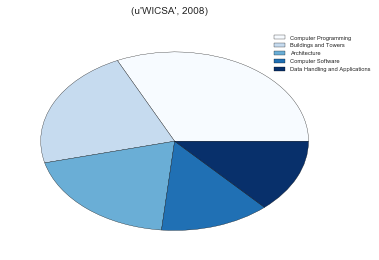

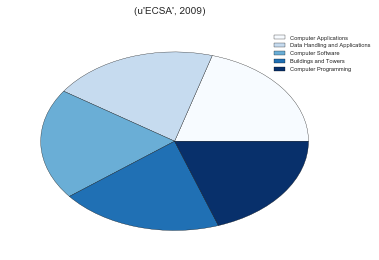

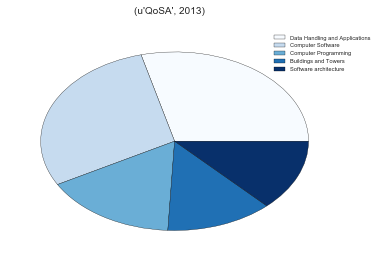

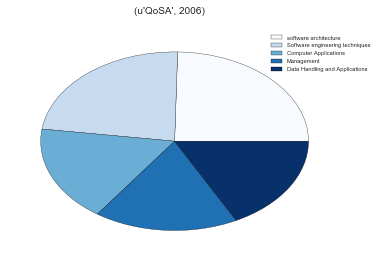

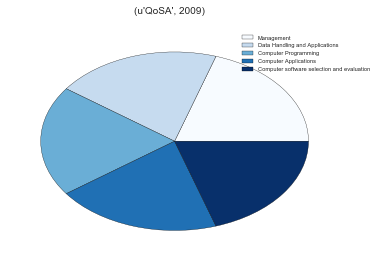

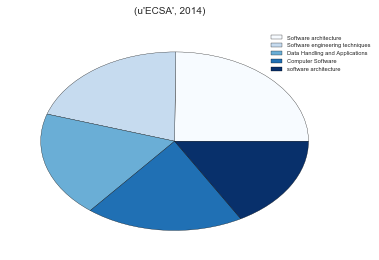

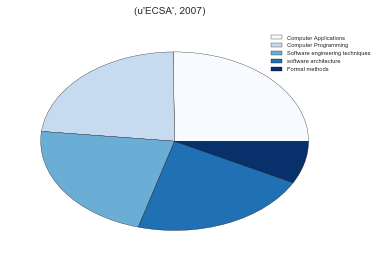

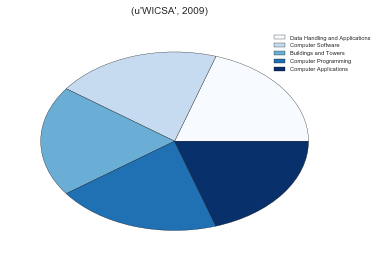

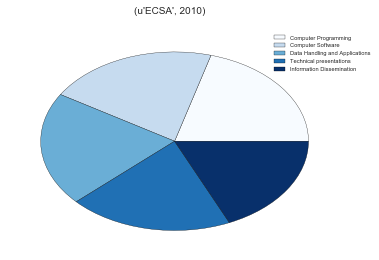

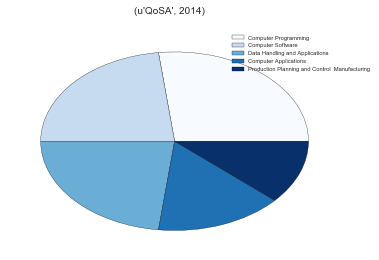

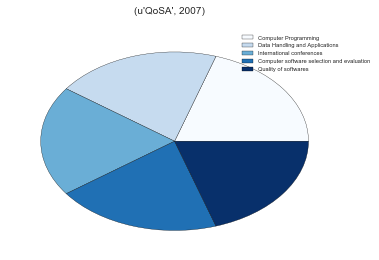

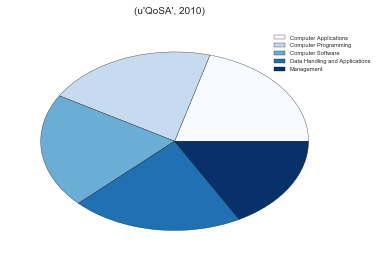

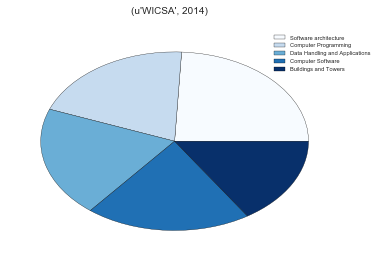

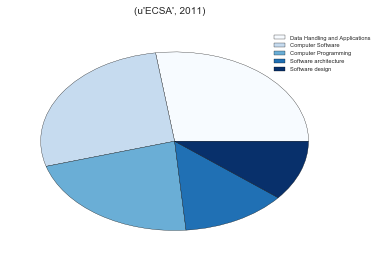

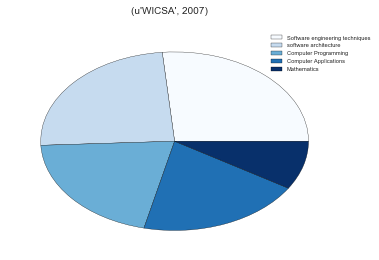

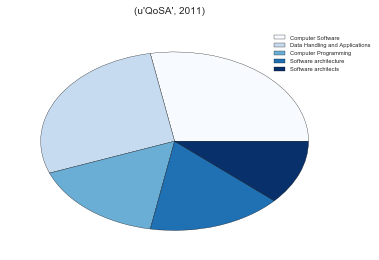

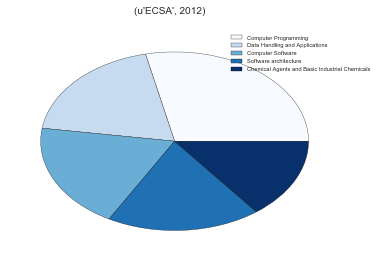

In [9]:
tryit = confYrKeywords(top = 5)

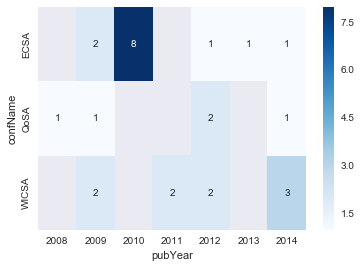

In [10]:
t = getKWTRends('Research', 'keyword')

/Users/aileennovero1/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


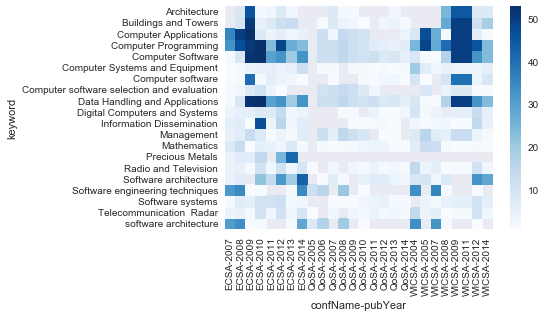

In [11]:
f = seeKWTop20()
#keys = np.array(f['data']['Top20'].keyword)
#keys.sort()
#keys

# Merging Papers and Authors!  YAYAYAYAYA!!!!

In [12]:
def getPaperAuthorMerge():
    
    with sqlite3.connect(mydb) as con:
        sqlcmd = "SELECT * FROM PAPERAUTHOR"
        
        papaudf = pd.read_sql_query(sqlcmd, con)
        
        sqlcmd2 = "SELECT paperID,title,confName, pubYear FROM PAPER"
        
        pap  = pd.read_sql_query(sqlcmd2, con)
        
        merged = papaudf.merge(pap, on =  'paperID')
        
        merged['counts'] = merged.groupby(['authorName'])['authorName'].transform('count')
        
        ap = merged.sort_values(by = ['counts','authorName'], ascending = False)
        
        entries = []
        for row in ap.as_matrix():
            entry = {key: value for (key, value) in zip(ap.columns, row)}
            entries.append(entry)
        return dict(data = entries)  , ap 

def confYrAuthor():
    grouper = ['confName', 'pubYear']
    m, f = getPaperAuthorMerge()
    grouper = ['confName', 'pubYear']
    testgroup = f.groupby(grouper)
    
    myentries = []
    for group in testgroup.groups.keys():
        authorcts = testgroup.get_group((group)).groupby(["authorName"])["authorName"].count()
        
        resetAU = pd.DataFrame(authorcts).rename(columns = {'authorName' : 'IndivCt'})
        resetAU.reset_index(inplace = True)
        
        mer = pd.merge(resetAU, testgroup.get_group((group)))
            
        entry = {}
        entry['Group'] = group
        entry['AuthorsPapers'] = mer
        
        
        myentries.append(entry)
    
    return dict(data = myentries)
            
def getauthorsbyID(paperID):
    dframe = df2
    query = 'paperID == %d' %paperID
    return dframe.query(query)

def getauthorsbyName(author):
    dframe = df2
    query = 'authorName == "%s"' %author
    return dframe.query(query)


In [13]:
dictionary, df2 = getPaperAuthorMerge()

In [14]:
df2.head(40)

,paperID,authorName,title,confName,pubYear,counts
46,13,Van Vliet Hans,Ontology based software architecture documenta...,ECSA,2012,23
50,14,Van Vliet Hans,Ontology based software architecture documenta...,WICSA,2012,23
392,103,Van Vliet Hans,The lonesome architect,ECSA,2009,23
516,148,Van Vliet Hans,Building up and reasoning about architectural ...,QoSA,2006,23
519,149,Van Vliet Hans,Building up and exploiting architectural knowl...,WICSA,2005,23
910,260,Van Vliet Hans,A systematic review of system of systems archi...,QoSA,2013,23
1100,316,Van Vliet Hans,Architectural knowledge Getting to the core,QoSA,2007,23
1245,370,Van Vliet Hans,Designing the enterprise architecture function,QoSA,2008,23
1248,371,Van Vliet Hans,Stakeholder perception of enterprise architecture,ECSA,2008,23
1540,454,Van Vliet Hans,A Just In Time architectural knowledge sharing...,WICSA,2008,23


In [15]:
authByID = getauthorsbyID(9)
authByID

,paperID,authorName,title,confName,pubYear,counts
31,9,Garlan David,An architecture for coordinating multiple self...,WICSA,2004,14
32,9,Schmerl Bradley,An architecture for coordinating multiple self...,WICSA,2004,7
33,9,Steenkiste Peter,An architecture for coordinating multiple self...,WICSA,2004,1
30,9,Huang An Cheng,An architecture for coordinating multiple self...,WICSA,2004,1
29,9,Cheng Shang Wen,An architecture for coordinating multiple self...,WICSA,2004,1


In [16]:
authByName = getauthorsbyName("Schmerl  Bradley")
authByName

,paperID,authorName,title,confName,pubYear,counts
32,9,Schmerl Bradley,An architecture for coordinating multiple self...,WICSA,2004,7
433,117,Schmerl Bradley,Architecture based run time fault diagnosis,ECSA,2011,7
896,256,Schmerl Bradley,An architectural approach to end user orchestr...,ECSA,2011,7
1529,452,Schmerl Bradley,Semi automated incremental synchronization bet...,WICSA,2005,7
2398,731,Schmerl Bradley,Understanding tradeoffs among different archit...,WICSA,2004,7
2813,860,Schmerl Bradley,Architecture based self protecting software sy...,QoSA,2013,7
4417,1278,Schmerl Bradley,uDesign End user design applied tomonitoring ...,WICSA,2008,7


In [72]:
def confYrAuthor():
    grouper = ['confName', 'pubYear']
    m, f = getPaperAuthorMerge()
    grouper = ['confName', 'pubYear']
    testgroup = f.groupby(grouper)
    
    myentries = []
    for group in testgroup.groups.keys():
        authorcts = testgroup.get_group((group)).groupby(["authorName"])["authorName"].count()
        
        resetAU = pd.DataFrame(authorcts).rename(columns = {'authorName' : 'IndivCt'})
        resetAU.reset_index(inplace = True)
        
        mer = pd.merge(resetAU, testgroup.get_group((group)))
            
        entry = {}
        entry['Group'] = group
        entry['mer'] = mer
        
        
        myentries.append(entry)
    
    return myentries
        
#@App.route('/confyrAuthor_bd/<conf>/<year>', methods=('GET',))
def confYrAuthor2(conf, year):
    grouper = ['confName', 'pubYear']
    d,f = getPaperAuthorMerge()
    grouper = ['confName', 'pubYear']
    group = f.groupby(grouper)
    
    try:
        print (conf, year)
        subgroup =  group.get_group((conf, year))
                                  
        print ('subgroupmade')
        cts = subgroup.groupby(["authorName"])["authorName"].count()
        
            
        resetAU = pd.DataFrame(cts).rename(columns = {'authorName' : 'IndivCt'})
        resetAU.reset_index(inplace = True)
        
        merged = pd.merge(resetAU, subgroup)

        mytable = []
        for idx in merged.index.get_values():
            entry = {}
            entry['Author'] = merged.loc[idx]['authorName']
            entry['paperID'] = merged.loc[idx]['paperID']
            entry['Title'] = merged.loc[idx]['title']
            entry['AuthorYrCount'] = merged.loc[idx]['IndivCt']    
            
            mytable.append(entry)
        
        return dict(data = mytable)
    
    except:
        print('Conference Year error')
        mytable = {entry['Author'] : 'No Conference Data',
                   entry['paperID'] : 'No Conference Data',
                   entry['Title'] : 'No Conference Data',
                   entry['AuthorYrCount'] : 'No Conference Data'
                   }
        return dict(data = mytable)
 


In [70]:
d = confYrAuthor2('WICSA', 2004)

('WICSA', 2004)
subgroupmade


In [71]:
d  
           

{'data': [{'Author': u' Aigner  R',
   'AuthorYrCount': 1,
   'Title': u'The COMQUAD component container architecture',
   'paperID': 240},
  {'Author': u' America  P',
   'AuthorYrCount': 2,
   'Title': u'Component replacement in a long living architecture  the 3RDBA approach',
   'paperID': 447},
  {'Author': u' America  P',
   'AuthorYrCount': 2,
   'Title': u'A scenario driven approach for value, risk, and cost analysis in system architecting for innovation',
   'paperID': 1407},
  {'Author': u' America  Pierre',
   'AuthorYrCount': 2,
   'Title': u'Component replacement in a long living architecture  The 3RDBA approach',
   'paperID': 448},
  {'Author': u' America  Pierre',
   'AuthorYrCount': 2,
   'Title': u'A scenario driven approach for value, risk, and cost analysis in system architecting for innovation',
   'paperID': 1408},
  {'Author': u' Andersson  J',
   'AuthorYrCount': 1,
   'Title': u'Real world influences on software architecture   interviews with industrial system e

In [68]:
mytable

[{'Author': u' Aigner  R',
  'AuthorYrCount': 1,
  'Title': u'The COMQUAD component container architecture',
  'paperID': 240},
 {'Author': u' America  P',
  'AuthorYrCount': 2,
  'Title': u'Component replacement in a long living architecture  the 3RDBA approach',
  'paperID': 447},
 {'Author': u' America  P',
  'AuthorYrCount': 2,
  'Title': u'A scenario driven approach for value, risk, and cost analysis in system architecting for innovation',
  'paperID': 1407},
 {'Author': u' America  Pierre',
  'AuthorYrCount': 2,
  'Title': u'Component replacement in a long living architecture  The 3RDBA approach',
  'paperID': 448},
 {'Author': u' America  Pierre',
  'AuthorYrCount': 2,
  'Title': u'A scenario driven approach for value, risk, and cost analysis in system architecting for innovation',
  'paperID': 1408},
 {'Author': u' Andersson  J',
  'AuthorYrCount': 1,
  'Title': u'Real world influences on software architecture   interviews with industrial system experts',
  'paperID': 535},
 {'

In [18]:
rr = confYrAuthor()

In [19]:
print rr[0]['Group']

gg = rr[0]['mer']

(u'WICSA', 2004)


In [20]:
gg

,authorName,IndivCt,paperID,title,confName,pubYear,counts
0,Aigner R,1,240,The COMQUAD component container architecture,WICSA,2004,1
1,America P,2,447,Component replacement in a long living archite...,WICSA,2004,2
2,America P,2,1407,"A scenario driven approach for value, risk, an...",WICSA,2004,2
3,America Pierre,2,448,Component replacement in a long living archite...,WICSA,2004,4
4,America Pierre,2,1408,"A scenario driven approach for value, risk, an...",WICSA,2004,4
5,Andersson J,1,535,Real world influences on software architecture...,WICSA,2004,1
6,Balasubramaniam D,1,967,Support for evolving software architectures in...,WICSA,2004,5
7,Bass L,1,136,Experience using an expert system to assist an...,WICSA,2004,4
8,Bonta E,1,650,Generating well synchronized multithreaded pro...,WICSA,2004,1
9,Brown T J,2,543,A network architectural style for real time sy...,WICSA,2004,2


In [26]:
ids = np.array(df2.paperID)
yrs = np.array(df2.pubYear)
cts = np.array(df2.counts)*10

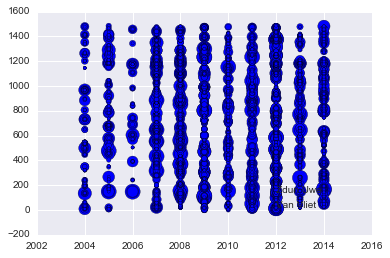

In [28]:
plt.scatter(yrs, ids, s = cts)
plt.text(2012, 140, 'Zdun Uwe')
plt.text(2012, 13, 'Van Vliet')

In [29]:
labels = {'WICSA' :1 ,
         'ECSA' : 2,
         'QoSA' : 3}
    
    

In [30]:
labels["WICSA"]

1

In [31]:
df2['codedconf'] = df2.confName.apply(lambda x: labels[x])

In [32]:
df2.head()

,paperID,authorName,title,confName,pubYear,counts,codedconf
46,13,Van Vliet Hans,Ontology based software architecture documenta...,ECSA,2012,23,2
50,14,Van Vliet Hans,Ontology based software architecture documenta...,WICSA,2012,23,1
392,103,Van Vliet Hans,The lonesome architect,ECSA,2009,23,2
516,148,Van Vliet Hans,Building up and reasoning about architectural ...,QoSA,2006,23,3
519,149,Van Vliet Hans,Building up and exploiting architectural knowl...,WICSA,2005,23,1


In [33]:
map1 = { 'a': 1, 'b':2 }
inv_map = {v: k for k, v in map1.items()}

In [34]:
inv_map

{1: 'a', 2: 'b'}

In [38]:
a = df2.authorName.drop_duplicates()

In [42]:
df2['codedauthor'] = df2.confName.apply(lambda x: labels[x])

In [43]:
def testspot(kw, grouper):
    
    m, f = getPapersKWgroup(grouper)
    
    query2 = '"%s" == keyword' %kw
    
    data_frame = m.copy()
    data_frame.query(query2, inplace = True)
    new = data_frame.copy()
    
    KWgrouper = ["pubYear", "confName"]

    df = getSpot(new, KWgrouper)
    return df
    
    

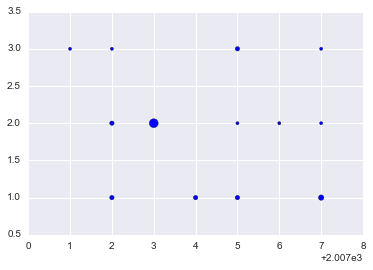

In [46]:
d = testspot('Research', 'keyword')